# Time-Series Pattern Recognition and Forecasting with Python and ChatGPT

This hands-on exercise demonstrates how to analyze time-series sales data using Python and the ChatGPT API.

## Dataset Overview
**File:** `time_series_sales_data.csv`

This dataset includes daily sales for three products over 60 days.
- `Date`: Calendar date
- `Product`: Product name
- `Sales`: Daily sales volume


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import openai
import os

# Load dataset
# Insert your path here
df = pd.read_csv('/content/sample_data/time_series_sales_data.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Date,Product,Sales
0,2024-01-01,Product_A,195
1,2024-01-02,Product_A,212
2,2024-01-03,Product_A,188
3,2024-01-04,Product_A,210
4,2024-01-05,Product_A,224


## Step 1: Data Examination

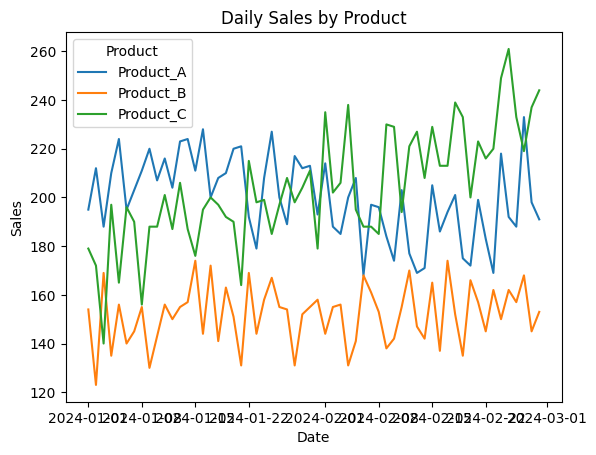

In [3]:
# Plot daily sales for each product
sns.lineplot(data=df, x='Date', y='Sales', hue='Product')
plt.title('Daily Sales by Product')
plt.ylabel('Sales')
plt.show()

## Step 2: Pattern Identification (Python)

<Axes: title={'center': 'Product_A Sales Trend'}, xlabel='Date'>

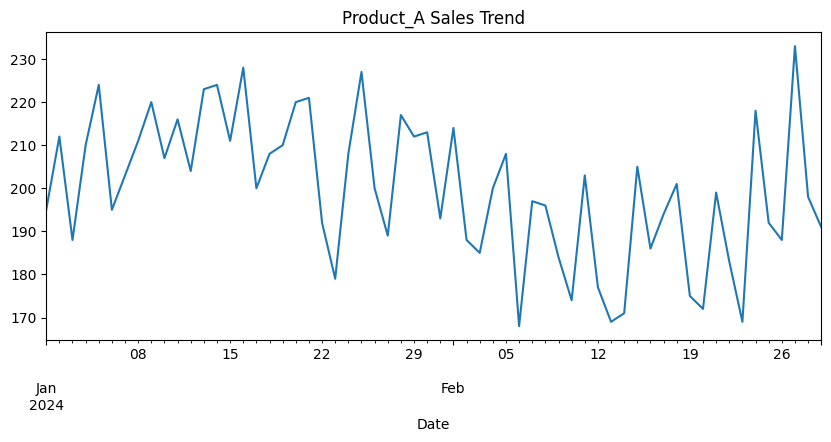

In [4]:
# Check for seasonality or trends
product_a = df[df['Product'] == 'Product_A'].set_index('Date')
product_a['Sales'].plot(title='Product_A Sales Trend', figsize=(10,4))

## Step 3: Simple Forecasting (Python)

<Axes: title={'center': 'Product_A: Sales vs 7-Day MA'}, xlabel='Date'>

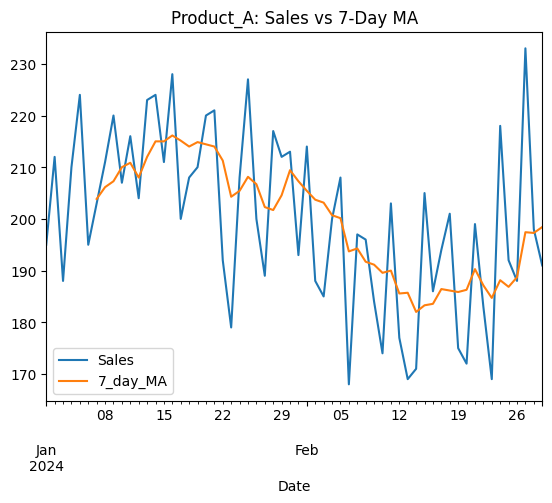

In [5]:
# 7-day moving average forecast for Product_A
product_a['7_day_MA'] = product_a['Sales'].rolling(window=7).mean()
product_a[['Sales', '7_day_MA']].plot(title='Product_A: Sales vs 7-Day MA')

## Step 4: ChatGPT API-Assisted Pattern Analysis and Forecasting

In [8]:
from openai import OpenAI

# It's recommended to use Colab's secret manager to store your API key
# from google.colab import userdata
# client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))
client = OpenAI(api_key='insert your key here')


# Aggregate for ChatGPT-friendly format
summary = df.groupby(['Product', 'Date']).sum().reset_index()
pivoted = summary.pivot(index='Date', columns='Product', values='Sales').fillna(0)

# Use recent 30 days for analysis
recent = pivoted.tail(30)
summary_text = recent.reset_index().to_string(index=False)

# Prompt
prompt = f"""You are a data analyst. Here is the last 30 days of daily sales data for 3 products:\n{summary_text}

Please:
1. Identify any trends, seasonality, or unusual patterns
2. Forecast the next 7 days of sales for each product
3. Explain the rationale behind your forecast
4. Suggest any business actions to take based on the trends"""

response = client.chat.completions.create(
    model="gpt-4-turbo",
    messages=[{"role": "system", "content": "You are a helpful data analyst."},
              {"role": "user", "content": prompt}],
    max_tokens=800
)

print("\n--- ChatGPT Forecast & Insights ---\n")
print(response.choices[0].message.content)


--- ChatGPT Forecast & Insights ---

### Data Analysis & Initial Observations:

Let's start by closely examining the provided data for each product across the last 30 days:

1. **Product A**: 
   - Range: Min = 168, Max = 233, Mean ≈ 192.93
   - No clear upward or downward trend.
   
2. **Product B**: 
   - Range: Min = 131, Max = 174, Mean ≈ 152.40
   - Also appears to maintain a relatively stable mean without clear trends.
   
3. **Product C**: 
   - Range: Min = 179, Max = 261, Mean ≈ 219.40
   - Shows slightly higher variability and a potential slight upward trend in the latter part of the dataset.

### Forecasting Sales:

For forecasting, I will use a simple model considering the last observed data points and the mean trends. Given the stable mean and no clear seasonality or trends, a moving average could be a good approach. Here, to keep it straightforward, I'll project using the mean of the last 7 days as the forecast for the next week.

#### Calculating the Mean of the Last 7 

## Summary
- Used Python to visualize and detect trends and patterns
- Applied moving average for simple forecasting
- Used ChatGPT API to interpret time-series data and produce a 7-day forecast with business recommendations

**Tip:** Use LLMs for executive summary generation, pattern detection, and ideation—especially when working with semi-structured time-series data.